In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1 = pd.read_csv('/home/abhishek/Documents/ML_Projects/HousePricePrediction/Bengaluru_House_Data.csv')


In [3]:
drop_columns = ['area_type','availability','society']
df2 = df1.drop(drop_columns,axis=1)


In [4]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [5]:
df3 = df2.dropna()

In [6]:
def convert_size_into_numeric(x):
    return int(x.split(' ')[0])

In [7]:
# Transforming the size into numeric values
df3['size_numeric'] = df3['size'].apply(convert_size_into_numeric)

/tmp/ipykernel_11311/80423784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['size_numeric'] = df3['size'].apply(convert_size_into_numeric)


In [8]:
# Function to check wheather the total_sqft is float or not
def check_sqft(x):
    try:
        float(x)
    except:
        return False
    return True


In [9]:
df4 =df3[~df3['total_sqft'].apply(check_sqft)]

In [10]:
df4

,location,size,total_sqft,bath,balcony,price,size_numeric
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


In [11]:
# Function to find the average of the sqft
def sqft_avg(x):
    list_values = x.split('-')
    if len(list_values)==2:
        return((float(list_values[0])+float(list_values[1]))/2)
    try:
        return float(x)
        
    except:
        return None
        

In [12]:
df3['total_sqft'] = df3['total_sqft'].apply(sqft_avg)

/tmp/ipykernel_11311/865068035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['total_sqft'] = df3['total_sqft'].apply(sqft_avg)


In [13]:
x=round(df3['total_sqft'].mean(),2)
df3['total_sqft'].fillna(x,inplace=True)

/home/abhishek/.local/lib/python3.8/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [14]:
df4 = df3.copy()

In [15]:
location_status = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_status_lessthan_10 = location_status[location_status<=10]

In [16]:
df4['location'] = df4['location'].apply(lambda x : 'others' if x in location_status_lessthan_10 else x)

In [17]:
df4['price_per_sqft'] = round(df4['price']*100000/df4['total_sqft'],2)



In [18]:
df4

,location,size,total_sqft,bath,balcony,price,size_numeric,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.00
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,6530.61
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.83
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.55
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,10407.34


In [19]:
df4[df4.total_sqft/df4.size_numeric<300]

,location,size,total_sqft,bath,balcony,price,size_numeric,price_per_sqft
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.98
68,others,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.30
70,others,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.00
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.61
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.21
...,...,...,...,...,...,...,...,...
13219,Laggere,7 Bedroom,1590.0,9.0,3.0,132.0,7,8301.89
13221,others,9 Bedroom,1178.0,9.0,1.0,75.0,9,6366.72
13281,Margondanahalli,5 Bedroom,1375.0,5.0,1.0,125.0,5,9090.91
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,3.0,70.0,5,9043.93


In [20]:
df5 = df4[~(df4.total_sqft/df4.size_numeric<300)]

In [21]:
df5.shape

(12052, 8)

In [22]:
# Function to remove extreme points in each location
def remove_outliers(df):
    df_out = pd.DataFrame()
    for  key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        s = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>=(m-s)) & (subdf.price_per_sqft <=(m+s))]
        df_out = pd.concat([df_out,reduced_df])
   
        
    return df_out

In [23]:
df6 = remove_outliers(df5)

In [24]:
df6.shape

(9890, 8)

In [25]:
# Function to plot scatter plot
def plot_scatterplot(df,location):
    bhk2 = df[(df.location == location) & (df.size_numeric == 2)]
    bhk3 = df[(df.location == location) & (df.size_numeric == 3)]
    plt.scatter(bhk2.total_sqft	, bhk2.price, marker='*',color = 'blue',label='2 BHK',s=100)
    plt.scatter(bhk3.total_sqft	,bhk3.price,color='green',label='3 BHK',s=50)
    plt.xlabel('Total Square Foot')
    plt.ylabel('Price in Lakhs')
    plt.legend()

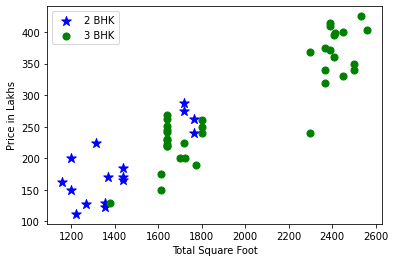

In [26]:
plot_scatterplot(df6,'Rajaji Nagar')

Text(0, 0.5, 'Count')

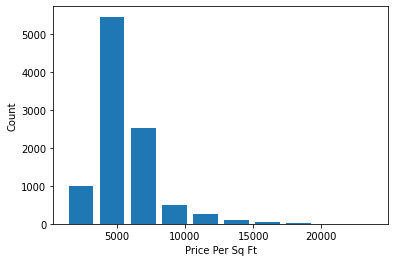

In [27]:
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel('Price Per Sq Ft')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

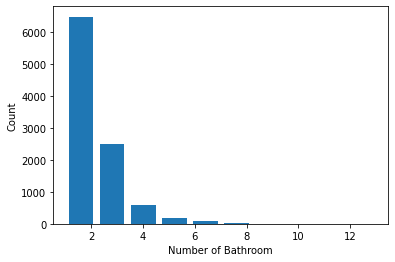

In [28]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel('Number of Bathroom')
plt.ylabel('Count')

In [29]:
# Removing the dataset on the basis of toilet count as comapred to BHK
df7 = df6[~(df6.bath>df6.size_numeric+2)]

In [30]:
df7
df8 = df7.drop(['size','price_per_sqft'],axis=1)

In [31]:
df8.shape

(9887, 6)

In [47]:
dummies = pd.get_dummies(df8.location)
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
152,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
341,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2474,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5030,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5771,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
df9 = pd.concat([df8,dummies.drop(['others'],axis="columns")],axis=1)

In [49]:
df10 = df9.drop(['location'],axis=1)

In [50]:
df10

,total_sqft,bath,balcony,price,size_numeric,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
152,1250.0,2.0,3.0,44.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
341,1250.0,2.0,2.0,40.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2474,1200.0,2.0,2.0,83.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5030,1170.0,2.0,2.0,40.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5771,1425.0,2.0,2.0,65.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13278,1256.0,2.0,1.0,65.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13285,1353.0,2.0,2.0,110.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13291,812.0,1.0,0.0,26.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13292,1440.0,2.0,2.0,63.93,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
X = df10.drop(['price'],axis=1)
Y= df10['price']

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [57]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(7909, 241)
(7909,)
(1978, 241)
(1978,)


In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

def find_best_model_for_data(X,Y):
    algos = {
        'linear_regressor' :{
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },
        'lasso' :{
            'model' : Lasso(),
            'params' :{
                'alpha' : [1,2],
                'selection' : ['random' ,'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse' ,'friedman_mse'],
                'splitter' : ['best','random']
            }
        }
    }
    scores = []
    kf = KFold(n_splits=5,shuffle=True)
    for algo_name,config in algos.items():
        clf = GridSearchCV(config['model'],config['params'],cv=kf,return_train_score=False)
        clf.fit(X,Y)
        scores.append({
            'model' : algo_name,
            'best_score' : clf.best_score_,
            'best_params' : clf.best_params_
        })
    return scores

In [85]:
find_best_model_for_data(X_train,Y_train)


/home/abhishek/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/home/abhishek/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pip

[{'model': 'linear_regressor',
  'best_score': 0.7956735685250734,
  'best_params': {'normalize': False}},
 {'model': 'lasso',
  'best_score': 0.6498042790729409,
  'best_params': {'alpha': 1, 'selection': 'random'}},
 {'model': 'decision_tree',
  'best_score': 0.6448886603116847,
  'best_params': {'criterion': 'mse', 'splitter': 'random'}}]

In [87]:
lr = LinearRegression(normalize = False)
lr.fit(X_train,Y_train)

/home/abhishek/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(normalize=False)

In [98]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'size_numeric', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=241)

In [108]:
np.where(X.columns == ' Devarachikkanahalli')[0][0]
# x= np.zeros(len(X.columns))
# x= np.zeros(len(X.columns))
# x

4

In [117]:
def predict_price(location,total_sqft, bath, balcony, size_numeric):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = total_sqft
    x[1] = bath
    x[2] = balcony
    x[3] = size_numeric
    if loc_index >=0:
        x[loc_index] = 1

    return lr.predict([x])[0]



In [123]:
predict_price('1st Phase JP Nagar',1000,2,2,2)

/home/abhishek/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.5986414257817

In [125]:
import pickle
with open('House_Price_Prediction_Model.pickle','wb') as f:
    pickle.dump(lr,f)

In [126]:
import json
columns = {
    'data_columns' :[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))